# Coconut palms detection

## Importing libraries

In [1]:
import torch
import torchvision
import torchvision.transforms as transforms
import torch.optim as optim
import torch.nn as nn
import torchvision.models as models
from torchvision.utils import draw_bounding_boxes
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
from numpy import loadtxt
from osgeo import gdal
from osgeo import gdal_array
import math
import geopandas as gpd

print("Libraries successfully imported!")

Libraries successfully imported!


## Loading raster as array and saving shape

In [2]:
rgb_array = np.load('../tables/rgb_test.npy')

print(f"The dimensions of the RGB array are {rgb_array.shape}")

array_height = rgb_array.shape[0]
array_width = rgb_array.shape[1]

The dimensions of the RGB array are (20145, 17761, 3)


## Creating zeros array to save score map

In [3]:
score_map = np.zeros((array_height, array_width), dtype= np.float64)

print(f"The shape of the zeros array for the nms visualization is {score_map.shape}")

The shape of the zeros array for the nms visualization is (20145, 17761)


## Moving window parameters

In [4]:
moving_window_step = 15

steps_nb_y = int((array_height-90) / moving_window_step)
print(f" The number of steps in the y direction is :{steps_nb_y}")

steps_nb_x = int((array_width-90) / moving_window_step)
print(f" The number of steps in the x direction is :{steps_nb_x}")

 The number of steps in the y direction is :1337
 The number of steps in the x direction is :1178


In [5]:
step_x = 0
step_y = 0
windows_nb = 0
for step_x in range(steps_nb_x):
    for step_y in range(steps_nb_y):
        windows_nb = windows_nb + 1
print(f"Number of total steps is {windows_nb}") 

Number of total steps is 1574986


## Loading values

In [6]:
scores_array = np.load('../tables/scores_array.npy')
iou_array = np.load('../tables/iou_array.npy')
corners_array = np.load('../tables/corners_array.npy')

In [7]:
scores_array.shape

(1574986, 1)

In [8]:
scores_i = 0
heatmap_threshold = 0.5

translation = 38

for step_y in range(steps_nb_y-1):
    for step_x in range(steps_nb_x):
        if scores_array[scores_i]>heatmap_threshold:
            score_map[(step_y*moving_window_step +translation):(step_y*moving_window_step + moving_window_step+translation), 
                      (step_x*moving_window_step+translation):(step_x*moving_window_step + moving_window_step+translation)] = scores_array[scores_i]
        else:
             score_map[(step_y*moving_window_step+translation):(step_y*moving_window_step + moving_window_step+translation), 
                      (step_x*moving_window_step+translation):(step_x*moving_window_step + moving_window_step+translation)] = 0
        
        scores_i += 1

In [16]:
graph_xsize = 1000
graph_ysize = 1000

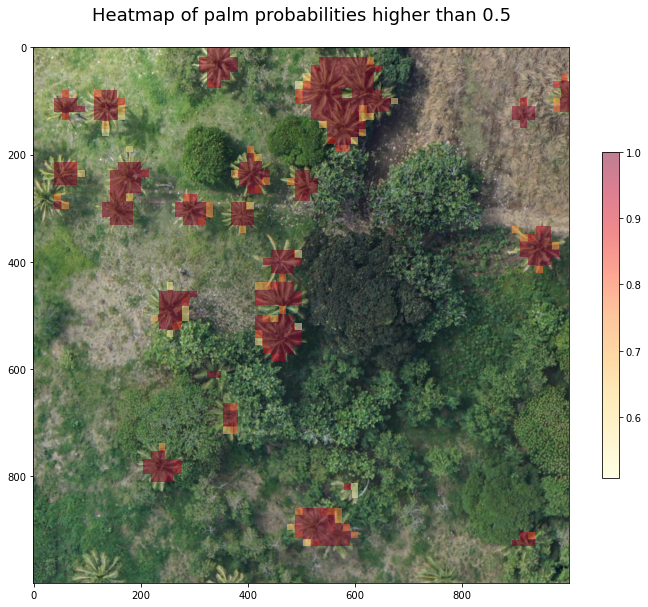

In [17]:
score_map_masked = np.ma.masked_where(score_map < 0.5, score_map)

plt.figure(figsize=(12,12))
plt.imshow(rgb_array[-graph_ysize:,:graph_xsize,:])
plt.imshow(score_map_masked[-graph_ysize:,:graph_xsize], cmap='YlOrRd', alpha = 0.5)
plt.title('Heatmap of palm probabilities higher than 0.5\n', fontsize=18)
plt.colorbar(shrink = 0.5)
plt.show()